In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import arcsine, norm
%matplotlib inline

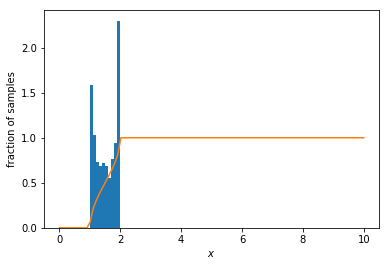

In [44]:
# Выбираем распределение Арксинуса
arcsin_rv = arcsine(1)

# Генерируем выборку объемом в 1000
selection = arcsin_rv.rvs(size=1000)

# Строим Гистограмму из нашей выборки
# !!! Note: заменил normed на density т.к. использую python 3.7 с более новой версией Matplotlib
plt.hist(selection, density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# Строим функцию распределения
x = np.linspace(0,10,100)
cdf = arcsin_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')


In [45]:
initialDispersion = np.var(selection)
initialAvg = np.mean(selection)

print(initialDispersion)
print(initialAvg)

# Дисперсия по начальной выборке = 0.1266130641242096
# Среднее выборочное по начально выборке = 1.5037360790556908

0.12084058938300635
1.5283345777201458


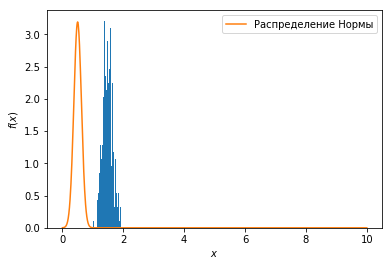

In [48]:
# volumes = [5, 10, 50]

# def getVolumeGraphs(n):
#     # Переменная определяющая распределение по объему
# #     arrangementByVol = arcsin_rv.rvs(n)
#     volMeanValues = []
#     # Цикл расчитывающий среднее для всех выборок по объему
#     for i in range(1000):
#         volMeanValues.append(arcsin_rv.rvs(n).mean())
#     # Рисуем гистограмму
#     plt.hist(volMeanValues, 100, density=True)
#     # Рисуем распределение плотности
#     x = np.linspace(0,10,1000)
# #     graphNorm = norm.pdf(x, 0.5, 0.125)
#     graphNorm = norm.pdf(x, 0.5, 0.125)
#     plt.plot(x, graphNorm, label="Распределение Нормы")
#     plt.legend()
#     plt.ylabel('$f(x)$')
#     plt.xlabel('$x$')

# getVolumeGraphs(5)
# getVolumeGraphs(10)
# getVolumeGraphs(50)
# for volume in volumes:
#     getVolumeGraphs(volume)
for n in [5, 10, 50]:
    # 1000 средних от выборки объемом n
    sample = [arcsin_rv.rvs(n).mean() for i in range(1000)]
    # гистограма результата
    plt.hist(sample, 100, density=True)
    
    # точки для графика
    x = np.linspace(-2, 4, 100)
    # среднее равно scale, но я не знаю почему
    loc = 1.5
    # дисперсия (формулу взял у Ромы, с формулой из вики всё ломалось)
    std = np.sqrt(loc**2 / n)
    # нормальное распределение от результатов экспоненциального распределения(?)
    norm = sts.norm.pdf(x, loc, std)
    
    # отрисовываем результат
    plt.plot(x, norm, label='нормальное теоретическое распределение')
    plt.legend()
    plt.title(f'Объем выборки {n}')
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

In [ ]:
# Вывод: Чем выше объем, тем больше точность аппроксимации